<a href="https://colab.research.google.com/github/unChris666/Data-Analysis-with-Python-by-Jovian/blob/main/Lesson/Lesson%206%20-%20Exploratory%20Data%20Analysis%20-%20A%20Case%20Study/zerotopandas-course-project-starter-v-20/zerotopandas-course-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Analysis with Python: Zero to Pandas - Course Project Guidelines
#### (remove this cell before submission)

Important links:
- Make submissions here: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
- Ask questions here: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
- Find interesting datasets here: https://jovian.ml/forum/t/recommended-datasets-for-course-project/11711


This is the starter notebook for the course project for [Data Analysis with Python: Zero to Pandas](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas). You will pick a real-world dataset of your choice and apply the concepts learned in this course to perform exploratory data analysis. Use this starter notebook as an outline for your project . Focus on documentation and presentation - this Jupyter notebook will also serve as a project report, so make sure to include detailed explanations wherever possible using Markdown cells.

### Evaluation Criteria

Your submission will be evaluated using the following criteria:

* Dataset must contain at least 3 columns and 150 rows of data
* You must ask and answer at least 4 questions about the dataset
* Your submission must include at least 4 visualizations (graphs)
* Your submission must include explanations using markdown cells, apart from the code.
* Your work must not be plagiarized i.e. copy-pasted for somewhere else.


Follow this step-by-step guide to work on your project.


### Step 1: Select a real-world dataset

- Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
- The data should be in CSV format, and should contain at least 3 columns and 150 rows
- Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

Here's some sample code for downloading the [US Elections Dataset](https://www.kaggle.com/tunguz/us-elections-dataset):

```
import opendatasets as od
dataset_url = 'https://www.kaggle.com/tunguz/us-elections-dataset'
od.download('https://www.kaggle.com/tunguz/us-elections-dataset')
```

You can find a list of recommended datasets here: https://jovian.ml/forum/t/recommended-datasets-for-course-project/11711

### Step 2: Perform data preparation & cleaning

- Load the dataset into a data frame using Pandas
- Explore the number of rows & columns, ranges of values etc.
- Handle missing, incorrect and invalid data
- Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)


### Step 3: Perform exploratory analysis & visualization

- Compute the mean, sum, range and other interesting statistics for numeric columns
- Explore distributions of numeric columns using histograms etc.
- Explore relationship between columns using scatter plots, bar charts etc.
- Make a note of interesting insights from the exploratory analysis

### Step 4: Ask & answer questions about the data

- Ask at least 4 interesting questions about your dataset
- Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
- Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
- Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does


### Step 5: Summarize your inferences & write a conclusion

- Write a summary of what you've learned from the analysis
- Include interesting insights and graphs from previous sections
- Share ideas for future work on the same topic using other relevant datasets
- Share links to resources you found useful during your analysis


### Step 6: Make a submission & share your work

- Upload your notebook to your Jovian.ml profile using `jovian.commit`.
- **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
- Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
- Browse through projects shared by other participants and give feedback


### (Optional) Step 7: Write a blog post

- A blog post is a great way to present and showcase your work.  
- Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
- Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
- Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml





### Example Projects

Refer to these projects for inspiration:

* [Analyzing StackOverflow Developer Survey Results](https://jovian.ml/aakashns/python-eda-stackoverflow-survey)

* [Analyzing Covid-19 data using Pandas](https://jovian.ml/aakashns/python-pandas-data-analysis)

* [Analyzing your browser history using Pandas & Seaborn](https://medium.com/free-code-camp/understanding-my-browsing-pattern-using-pandas-and-seaborn-162b97e33e51) by Kartik Godawat

* [WhatsApp Chat Data Analysis](https://jovian.ml/PrajwalPrashanth/whatsapp-chat-data-analysis) by Prajwal Prashanth

* [Understanding the Gender Divide in Data Science Roles](https://medium.com/datadriveninvestor/exploratory-data-analysis-eda-understanding-the-gender-divide-in-data-science-roles-9faa5da44f5b) by Aakanksha N S

* [2019 State of Javscript Survey Results](https://2019.stateofjs.com/demographics/)

* [2020 Stack Overflow Developer Survey Results](https://insights.stackoverflow.com/survey/2020)



**NOTE**: Remove this cell containing the instructions before making your submission. You can do using the "Edit > Delete Cells" menu option.

# Project Title - change this

TODO - Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. You can also mention about the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and what you've learned from it.

## Downloading the Dataset

**TODO** - add some explanation here

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [10]:
!pip install opendatasets forex-python --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 9.3 MB/s eta 0:00:00


In [12]:
import pandas as pd
import numpy as np
import re

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/hetbabariya/imdb-movies-data-collection-5000-records/'

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chrisbiran
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/hetbabariya/imdb-movies-data-collection-5000-records


100%|██████████| 934k/934k [00:00<00:00, 54.7MB/s]

The dataset has been downloaded and extracted.

In [5]:
data_dir = './imdb-movies-data-collection-5000-records'

In [6]:
import os
os.listdir(data_dir)

['IMDB_Movies_Dataset.csv']

## Data Preparation and Cleaning

**TODO** - Write some explanation here.



> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [27]:
movies_raw_df = pd.read_csv('/content/imdb-movies-data-collection-5000-records/IMDB_Movies_Dataset.csv')
movies_raw_df.columns

Index(['Unnamed: 0', 'Title', 'Average Rating', 'Director', 'Writer',
       'Metascore', 'Cast', 'Release Date', 'Country of Origin', 'Languages',
       'Budget', 'Worldwide Gross', 'Runtime'],
      dtype='object')

In [39]:
# Apply transformation to the 'Director' column
movies_raw_df['List Director'] = movies_raw_df['Director'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

movies_raw_df.head()

,Unnamed: 0,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,...,List Writer,List Cast,Release Month,Release Year,Release Country,List Languages,Budget in USD,Gross in USD,Runtime Minutes,List Director
0,0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,...,"[Stephen King, Frank Darabont]","[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",October,1994,India,[English],25.0,29.33,142,[Frank Darabont]
1,1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,...,"[Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue]","[Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue...",November,2024,Japan,[Japanese],NaN,3.51,145,[Yûichirô Hayashi]
2,2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin",...,"[Mario Puzo, Francis Ford Coppola]","[Marlon Brando, Al Pacino, James Caan, Diane K...",None,1978,India,"[English, Italian, Latin]",6.0,250.34,175,[Francis Ford Coppola]
3,3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,...,"[Umur Bugay, Rifat Ilgaz]","[Münir Özkul, Tarik Akan, Halit Akçatepe, Kema...",April,1975,Turkey,[Turkish],NaN,NaN,85,[Ertem Egilmez]
4,4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,...,"[Rani Burra, Ram Mohan, Yûgô Sakô]","[Arun Govil, Nikhil Kapoor, Edie Mirman, Rael ...",September,2001,India,[English],NaN,NaN,135,"[Ram Mohan, Yûgô Sakô, Koichi Saski]"


Make Writer into list

In [28]:
# Apply transformation to the 'Writer' column
movies_raw_df['List Writer'] = movies_raw_df['Writer'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

movies_raw_df.head()

,Unnamed: 0,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime,List Writer
0,0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes,"[Stephen King, Frank Darabont]"
1,1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,NaN,"$3,513,659",2 hours 25 minutes,"[Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue]"
2,2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000 (estimated)","$250,342,198",2 hours 55 minutes,"[Mario Puzo, Francis Ford Coppola]"
3,3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,NaN,NaN,1 hour 25 minutes,"[Umur Bugay, Rifat Ilgaz]"
4,4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,NaN,NaN,2 hours 15 minutes,"[Rani Burra, Ram Mohan, Yûgô Sakô]"


Make Cast into List

In [29]:
# Apply transformation to the 'Cast' column
movies_raw_df['List Cast'] = movies_raw_df['Cast'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

movies_raw_df.head()

,Unnamed: 0,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime,List Writer,List Cast
0,0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes,"[Stephen King, Frank Darabont]","[Tim Robbins, Morgan Freeman, Bob Gunton, Will..."
1,1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,NaN,"$3,513,659",2 hours 25 minutes,"[Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue]","[Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue..."
2,2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000 (estimated)","$250,342,198",2 hours 55 minutes,"[Mario Puzo, Francis Ford Coppola]","[Marlon Brando, Al Pacino, James Caan, Diane K..."
3,3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,NaN,NaN,1 hour 25 minutes,"[Umur Bugay, Rifat Ilgaz]","[Münir Özkul, Tarik Akan, Halit Akçatepe, Kema..."
4,4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,NaN,NaN,2 hours 15 minutes,"[Rani Burra, Ram Mohan, Yûgô Sakô]","[Arun Govil, Nikhil Kapoor, Edie Mirman, Rael ..."


Release date convert into month, year and country

In [30]:
# Function to extract the required details from the Release Date string
def extract_release_info(release_str):
    try:
        # Check if the format is like 'YYYY (Country)' or 'Month Day, Year (Country)'
        match = re.match(r'([a-zA-Z]+(?: [0-9]{1,2})?)?,? ([0-9]{4}) \((.*?)\)', release_str)

        if match:
            # Extract month (if present) and split it from day if necessary
            release_month = match.group(1).split()[0] if match.group(1) else None
            release_year = match.group(2)
            release_country = match.group(3)
            return pd.Series([release_month, release_year, release_country])
        else:
            # Handle cases like '1978 (Country)' or other mismatched formats
            match_year_country = re.match(r'([0-9]{4}) \((.*?)\)', release_str)
            if match_year_country:
                return pd.Series([None, match_year_country.group(1), match_year_country.group(2)])
            else:
                return pd.Series([None, None, None])
    except Exception as e:
        print(f"Error: {e}")
        return pd.Series([None, None, None])

# Apply the extraction function and assign to new columns
movies_raw_df[['Release Month', 'Release Year', 'Release Country']] = movies_raw_df['Release Date'].apply(extract_release_info)

movies_raw_df.head()


,Unnamed: 0,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime,List Writer,List Cast,Release Month,Release Year,Release Country
0,0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes,"[Stephen King, Frank Darabont]","[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",October,1994,India
1,1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,NaN,"$3,513,659",2 hours 25 minutes,"[Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue]","[Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue...",November,2024,Japan
2,2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000 (estimated)","$250,342,198",2 hours 55 minutes,"[Mario Puzo, Francis Ford Coppola]","[Marlon Brando, Al Pacino, James Caan, Diane K...",None,1978,India
3,3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,NaN,NaN,1 hour 25 minutes,"[Umur Bugay, Rifat Ilgaz]","[Münir Özkul, Tarik Akan, Halit Akçatepe, Kema...",April,1975,Turkey
4,4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,NaN,NaN,2 hours 15 minutes,"[Rani Burra, Ram Mohan, Yûgô Sakô]","[Arun Govil, Nikhil Kapoor, Edie Mirman, Rael ...",September,2001,India


In [41]:
# Apply transformation to the 'Country of Origin' column
movies_raw_df['List Country of Origin'] = movies_raw_df['Country of Origin'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

movies_raw_df.head()

,Unnamed: 0,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,...,List Cast,Release Month,Release Year,Release Country,List Languages,Budget in USD,Gross in USD,Runtime Minutes,List Director,List Country of Origin
0,0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,...,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",October,1994,India,[English],25.0,29.33,142,[Frank Darabont],[United States]
1,1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,...,"[Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue...",November,2024,Japan,[Japanese],NaN,3.51,145,[Yûichirô Hayashi],[Japan]
2,2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin",...,"[Marlon Brando, Al Pacino, James Caan, Diane K...",None,1978,India,"[English, Italian, Latin]",6.0,250.34,175,[Francis Ford Coppola],[United States]
3,3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,...,"[Münir Özkul, Tarik Akan, Halit Akçatepe, Kema...",April,1975,Turkey,[Turkish],NaN,NaN,85,[Ertem Egilmez],[Turkey]
4,4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,...,"[Arun Govil, Nikhil Kapoor, Edie Mirman, Rael ...",September,2001,India,[English],NaN,NaN,135,"[Ram Mohan, Yûgô Sakô, Koichi Saski]","[India, Japan]"


Make Languages into list

In [31]:
# Apply transformation to the 'Languages' column
movies_raw_df['List Languages'] = movies_raw_df['Languages'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

movies_raw_df.head()

,Unnamed: 0,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime,List Writer,List Cast,Release Month,Release Year,Release Country,List Languages
0,0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes,"[Stephen King, Frank Darabont]","[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",October,1994,India,[English]
1,1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,NaN,"$3,513,659",2 hours 25 minutes,"[Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue]","[Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue...",November,2024,Japan,[Japanese]
2,2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000 (estimated)","$250,342,198",2 hours 55 minutes,"[Mario Puzo, Francis Ford Coppola]","[Marlon Brando, Al Pacino, James Caan, Diane K...",None,1978,India,"[English, Italian, Latin]"
3,3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,NaN,NaN,1 hour 25 minutes,"[Umur Bugay, Rifat Ilgaz]","[Münir Özkul, Tarik Akan, Halit Akçatepe, Kema...",April,1975,Turkey,[Turkish]
4,4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,NaN,NaN,2 hours 15 minutes,"[Rani Burra, Ram Mohan, Yûgô Sakô]","[Arun Govil, Nikhil Kapoor, Edie Mirman, Rael ...",September,2001,India,[English]


Budget and Gross convert into USD

In [32]:
# Predefined exchange rates
preloaded_rates = {
    'INR': 0.012,  # Example: 1 INR = 0.012 USD
    'EUR': 1.10,   # Example: 1 EUR = 1.10 USD
    'GBP': 1.25,   # Example: 1 GBP = 1.25 USD
    'HKD': 0.13,   # Example: 1 HKD = 0.13 USD
    'FRF': 0.17,   # Example: 1 FRF = 0.17 USD
    'NOK': 0.10,   # Example: 1 NOK = 0.10 USD
    'IRR': 0.000024,  # Example: 1 IRR = 0.000024 USD
    'HUF': 0.0027,  # Example: 1 HUF = 0.0027 USD
    'THB': 0.029,   # Example: 1 THB = 0.029 USD
    'BDT': 0.0094,  # Example: 1 BDT = 0.0094 USD
    'DKK': 0.14,    # Example: 1 DKK = 0.14 USD
    'LVL': 1.62,    # Example: 1 LVL = 1.62 USD
    'SEK': 0.11,    # Example: 1 SEK = 0.11 USD
    'R$': 0.20,     # Example: 1 BRL = 0.20 USD
    '¥': 0.0072,    # Example: 1 JPY = 0.0072 USD
    'PKR': 0.0035,  # Example: 1 PKR = 0.0035 USD
    'A$': 0.64,     # Example: 1 AUD = 0.64 USD
}

In [33]:
def convert_to_million_in_usd(value, default_currency_code='USD'):
    """
    Converts a given currency string to USD and returns the value in millions.

    Args:
        value (str): The input currency value as a string.
        default_currency_code (str): Default currency code to use if none is found.

    Returns:
        float: The value converted to USD and scaled to millions.
    """
    try:
        # Handle NaN or None values
        if pd.isna(value):
            return np.NaN

        # Remove "(estimated)" and clean the string
        value = re.sub(r'\(estimated\)', '', str(value)).strip()

        # Match currency symbol/code and numeric value
        matches = re.match(r'([^\d]+)?([\d,\.]+)', value)
        if matches:
            symbol = matches.group(1).strip() if matches.group(1) else None
            numeric_value = matches.group(2).replace(',', '')
            amount = float(numeric_value)

            # Map symbols to currency codes
            symbol_to_code = {
                '$': 'USD',
                '₹': 'INR',
                '€': 'EUR',
                '£': 'GBP',
                '¥': 'JPY',
                'HK$': 'HKD',
                'FRF': 'FRF',
                'NOK': 'NOK',
                'IRR': 'IRR',
                'HUF': 'HUF',
                'THB': 'THB',
                'BDT': 'BDT',
                'DKK': 'DKK',
                'LVL': 'LVL',
                'SEK': 'SEK',
                'R$': 'R$',
                'A$': 'A$',
                'PKR': 'PKR',
            }
            currency_code = symbol_to_code.get(symbol, default_currency_code)

            # Convert to USD if currency code is not already USD
            if currency_code != 'USD' and currency_code in preloaded_rates:
                amount_in_usd = amount * preloaded_rates[currency_code]
            else:
                amount_in_usd = amount

            # Convert to millions and round to two decimals
            return round(amount_in_usd / 1_000_000, 2)
        else:
            return 0  # Return 0 for invalid format

    except Exception as e:
        print(f"Error converting currency: {e}")
        return 0

In [36]:
# Apply the conversion and create the new column
movies_raw_df['Budget in USD'] = movies_raw_df['Budget'].apply(convert_to_million_in_usd)

movies_raw_df['Gross in USD'] = movies_raw_df['Worldwide Gross'].apply(convert_to_million_in_usd)

movies_raw_df.head(5)

,Unnamed: 0,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,...,Worldwide Gross,Runtime,List Writer,List Cast,Release Month,Release Year,Release Country,List Languages,Budget in USD,Gross in USD
0,0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,...,"$29,332,133",2 hours 22 minutes,"[Stephen King, Frank Darabont]","[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",October,1994,India,[English],25.0,29.33
1,1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,...,"$3,513,659",2 hours 25 minutes,"[Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue]","[Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue...",November,2024,Japan,[Japanese],NaN,3.51
2,2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin",...,"$250,342,198",2 hours 55 minutes,"[Mario Puzo, Francis Ford Coppola]","[Marlon Brando, Al Pacino, James Caan, Diane K...",None,1978,India,"[English, Italian, Latin]",6.0,250.34
3,3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,...,NaN,1 hour 25 minutes,"[Umur Bugay, Rifat Ilgaz]","[Münir Özkul, Tarik Akan, Halit Akçatepe, Kema...",April,1975,Turkey,[Turkish],NaN,NaN
4,4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,...,NaN,2 hours 15 minutes,"[Rani Burra, Ram Mohan, Yûgô Sakô]","[Arun Govil, Nikhil Kapoor, Edie Mirman, Rael ...",September,2001,India,[English],NaN,NaN


In [37]:
# Function to convert the runtime string into minutes
def convert_runtime_to_minutes(runtime_str):
    try:
        # Match for hours and minutes in the format "X hours Y minutes" or "Y minutes"
        match = re.match(r'(?:(\d+) hours?)? ?(\d+) minutes?', runtime_str)

        if match:
            hours = int(match.group(1)) if match.group(1) else 0  # Default to 0 if no hours
            minutes = int(match.group(2))  # Minutes are always present

            # Convert total runtime into minutes
            total_minutes = (hours * 60) + minutes
            return total_minutes
        else:
            return 0  # Return 0 for invalid format
    except Exception as e:
        print(f"Error: {e}")
        return 0  # Return 0 in case of error

# Apply the conversion function to the 'Runtime' column
movies_raw_df['Runtime Minutes'] = movies_raw_df['Runtime'].apply(convert_runtime_to_minutes)

movies_raw_df.head()


,Unnamed: 0,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,...,Runtime,List Writer,List Cast,Release Month,Release Year,Release Country,List Languages,Budget in USD,Gross in USD,Runtime Minutes
0,0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,...,2 hours 22 minutes,"[Stephen King, Frank Darabont]","[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",October,1994,India,[English],25.0,29.33,142
1,1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,...,2 hours 25 minutes,"[Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue]","[Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue...",November,2024,Japan,[Japanese],NaN,3.51,145
2,2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin",...,2 hours 55 minutes,"[Mario Puzo, Francis Ford Coppola]","[Marlon Brando, Al Pacino, James Caan, Diane K...",None,1978,India,"[English, Italian, Latin]",6.0,250.34,175
3,3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,...,1 hour 25 minutes,"[Umur Bugay, Rifat Ilgaz]","[Münir Özkul, Tarik Akan, Halit Akçatepe, Kema...",April,1975,Turkey,[Turkish],NaN,NaN,85
4,4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,...,2 hours 15 minutes,"[Rani Burra, Ram Mohan, Yûgô Sakô]","[Arun Govil, Nikhil Kapoor, Edie Mirman, Rael ...",September,2001,India,[English],NaN,NaN,135


In [42]:
movies_raw_df.columns

Index(['Unnamed: 0', 'Title', 'Average Rating', 'Director', 'Writer',
       'Metascore', 'Cast', 'Release Date', 'Country of Origin', 'Languages',
       'Budget', 'Worldwide Gross', 'Runtime', 'List Writer', 'List Cast',
       'Release Month', 'Release Year', 'Release Country', 'List Languages',
       'Budget in USD', 'Gross in USD', 'Runtime Minutes', 'List Director',
       'List Country of Origin'],
      dtype='object')

In [43]:
selected_column = [
     'Title', 'Average Rating', 'Metascore', 'List Director', 'List Writer', 'List Cast',
       'Release Month', 'Release Year', 'Release Country', 'List Country of Origin', 'List Languages',
       'Budget in USD', 'Gross in USD', 'Runtime Minutes'
]

In [44]:
movies_df = movies_raw_df[selected_column]
movies_df.head()

,Title,Average Rating,Metascore,List Director,List Writer,List Cast,Release Month,Release Year,Release Country,List Country of Origin,List Languages,Budget in USD,Gross in USD,Runtime Minutes
0,The Shawshank Redemption,9.3,82.0,[Frank Darabont],"[Stephen King, Frank Darabont]","[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",October,1994,India,[United States],[English],25.0,29.33,142
1,Attack on Titan the Movie: The Last Attack,9.3,NaN,[Yûichirô Hayashi],"[Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue]","[Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue...",November,2024,Japan,[Japan],[Japanese],NaN,3.51,145
2,The Godfather,9.2,100.0,[Francis Ford Coppola],"[Mario Puzo, Francis Ford Coppola]","[Marlon Brando, Al Pacino, James Caan, Diane K...",None,1978,India,[United States],"[English, Italian, Latin]",6.0,250.34,175
3,Hababam Sinifi,9.2,NaN,[Ertem Egilmez],"[Umur Bugay, Rifat Ilgaz]","[Münir Özkul, Tarik Akan, Halit Akçatepe, Kema...",April,1975,Turkey,[Turkey],[Turkish],NaN,NaN,85
4,Ramayana: The Legend of Prince Rama,9.2,NaN,"[Ram Mohan, Yûgô Sakô, Koichi Saski]","[Rani Burra, Ram Mohan, Yûgô Sakô]","[Arun Govil, Nikhil Kapoor, Edie Mirman, Rael ...",September,2001,India,"[India, Japan]",[English],NaN,NaN,135


## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
>
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [45]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

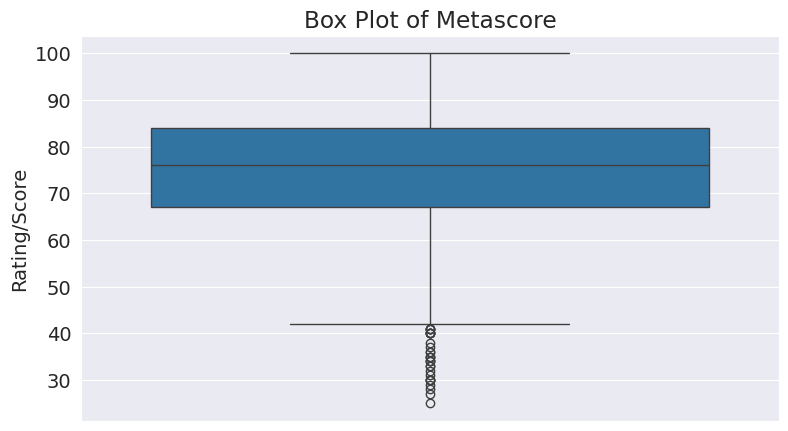

In [48]:
sns.boxplot(data=movies_df['Metascore'])
plt.title('Box Plot of Metascore')
plt.ylabel('Rating/Score')
plt.show()

In [ ]:
plt.hist(movies_df['Metascore'], bins=10, edgecolor='black')
plt.title('Histogram of Metascore')
plt.xlabel('Metascore')
plt.ylabel('Frequency')
plt.show()

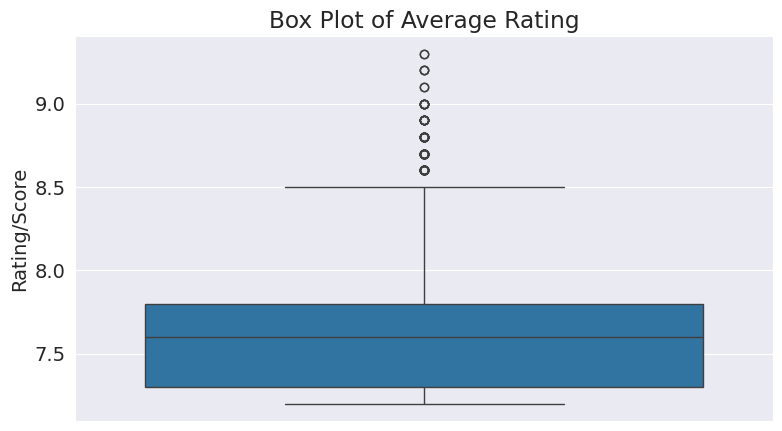

In [49]:
sns.boxplot(data=movies_df['Average Rating'])
plt.title('Box Plot of Average Rating')
plt.ylabel('Rating/Score')
plt.show()

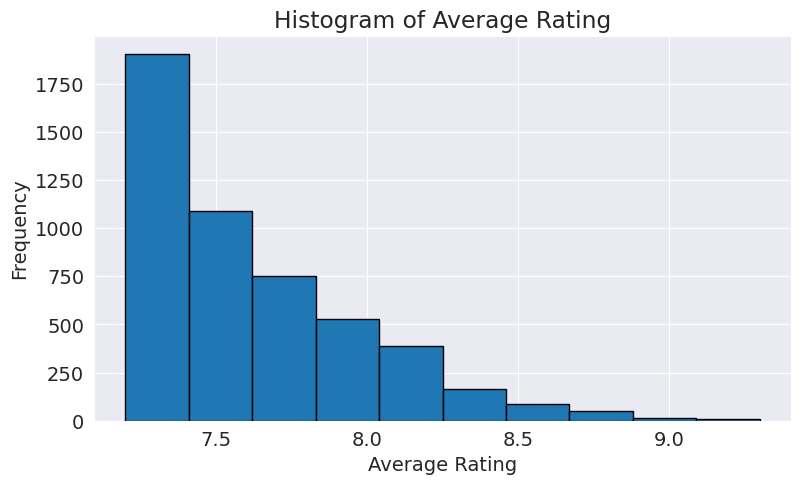

In [59]:
plt.hist(movies_df['Average Rating'], bins=10, edgecolor='black')
plt.title('Histogram of Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

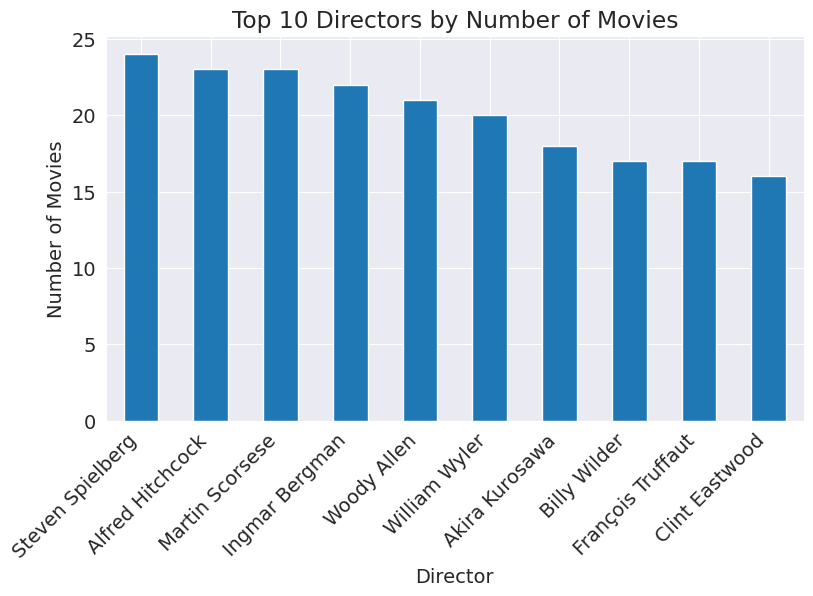

In [54]:
movies_raw_df['Director'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

Text(0, 0.5, 'Average Rating')

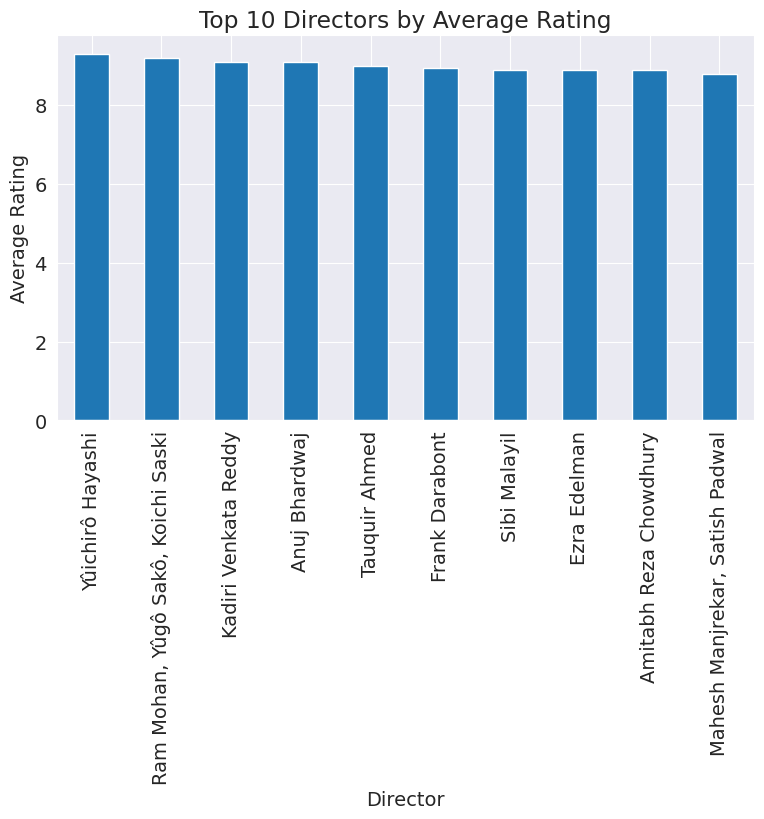

In [55]:
movies_raw_df.groupby('Director')['Average Rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Directors by Average Rating')
plt.xlabel('Director')
plt.ylabel('Average Rating')

Text(0, 0.5, 'Metascore')

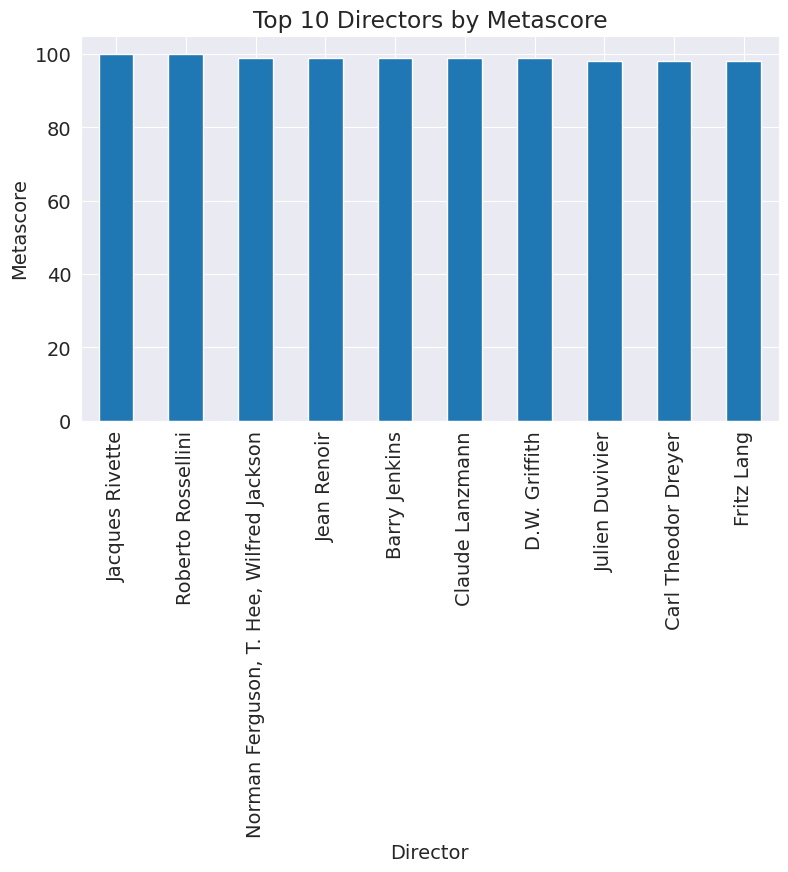

In [56]:
movies_raw_df.groupby('Director')['Metascore'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Directors by Metascore')
plt.xlabel('Director')
plt.ylabel('Metascore')

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: TODO - ask a question here and answer it below

#### Q2: TODO - ask a question here and answer it below

#### Q3: TODO - ask a question here and answer it below

#### Q4: TODO - ask a question here and answer it below

#### Q5: TODO - ask a question here and answer it below

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
>
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
>
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml




In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'